In [2]:
# Air Quality Index Project.

# Importing necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [ ]:
# Reading the dataset.
dataset=pd.read_csv("C:\Project\AQI-and-Lat-Long-of-Countries.csv")

# Displaying the first 5 rows of the dataset.
dataset.head(5)

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\ahmed\AppData\Local\Temp\ipykernel_7276\4262903743.py:2: SyntaxWarning: invalid escape sequence '\P'
  dataset=pd.read_csv("C:\Project\AQI-and-Lat-Long-of-Countries.csv")


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


In [ ]:
# Data Preprocessing.

# Checking for null values in the dataset.
dataset.isnull().sum()

AQI Value          0
CO AQI Value       0
Ozone AQI Value    0
NO2 AQI Value      0
PM2.5 AQI Value    0
lat                0
lng                0
dtype: int64

In [ ]:
data = dataset.dropna()   # Dropping rows with null values.
data.columns = [col.strip().lower() for col in data.columns]    # Renaming columns to lowercase and removing leading/trailing spaces.

In [ ]:
data.describe() # Displaying the statistical summary of the dataset.

,aqi value,co aqi value,ozone aqi value,no2 aqi value,pm2.5 aqi value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [8]:
data.info() # Displaying the information about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   aqi value        16695 non-null  int64  
 1   co aqi value     16695 non-null  int64  
 2   ozone aqi value  16695 non-null  int64  
 3   no2 aqi value    16695 non-null  int64  
 4   pm2.5 aqi value  16695 non-null  int64  
 5   lat              16695 non-null  float64
 6   lng              16695 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 913.1 KB


<Figure size 1000x600 with 0 Axes>

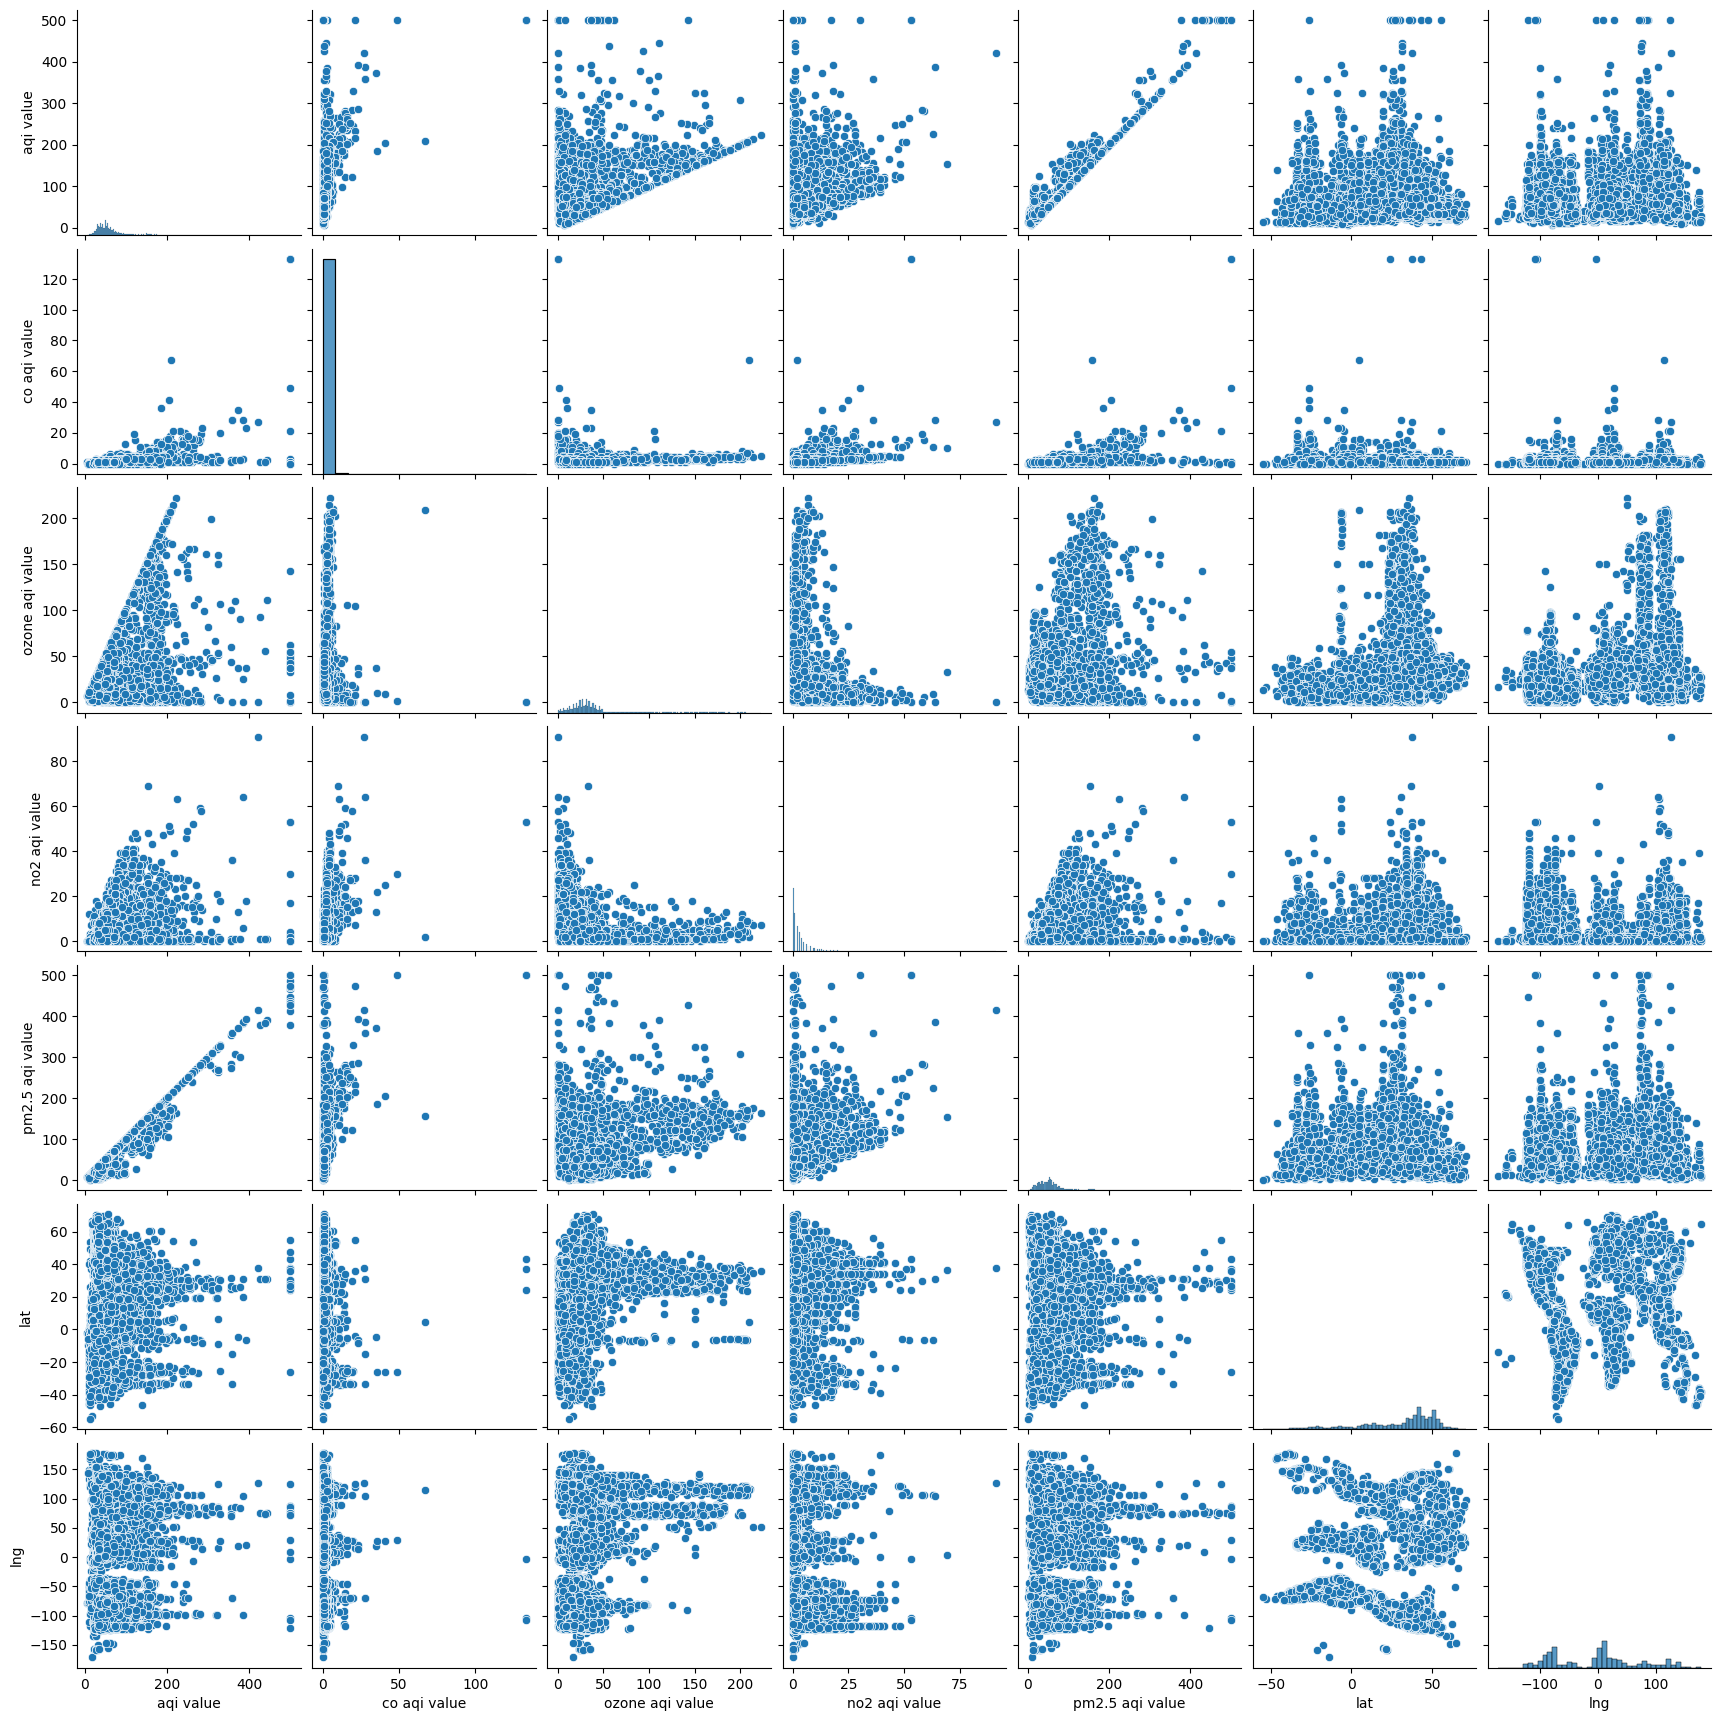

In [42]:
# exploratory data analysis (EDA).

plt.figure(figsize=(10, 6))  # Setting the figure size for the plot.
sns.pairplot(data) # Plotting pairwise relationships in the dataset.
plt.show()

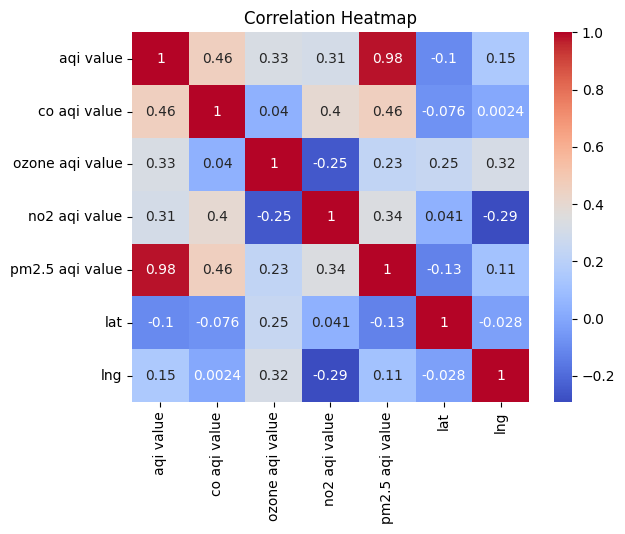

In [14]:
corr=data.corr() # Calculating the correlation matrix.  

sns.heatmap(corr, annot=True, cmap='coolwarm') # Plotting the heatmap of the correlation matrix.
plt.title('Correlation Heatmap')
plt.show()

In [18]:
x = data[['co aqi value', 'ozone aqi value', 'no2 aqi value', 'pm2.5 aqi value']]
y = data['aqi value']

In [ ]:
 # Importing necessary libraries for machine learning.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
model= RandomForestRegressor(n_estimators=100, random_state=42)  # Initializing the Random Forest Regressor model.
model.fit(x_train, y_train)  # Fitting the model on the training data.

RandomForestRegressor(random_state=42)

In [21]:
model1= LinearRegression()  # Initializing the Linear Regression model.
model1.fit(x_train, y_train)  # Fitting the model on the training data.

LinearRegression()

In [24]:
# Model Evaluation.
y_pred = model.predict(x_test)  # Making predictions on the test set.
y_pred1 = model1.predict(x_test)  # Making predictions using the Linear Regression model

print("Random Forest Regressor Model Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))  # Calculating Mean Squared Error.
print("R-squared:", r2_score(y_test, y_pred))  # Calculating R-squared value.
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))  # Calculating Mean Absolute Error.

print("\nLinear Regression Model Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred1))  #
print("R-squared:", r2_score(y_test, y_pred1))  # Calculating R-squared value.
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred1))  # Calculating Mean Absolute Error.

Random Forest Regressor Model Evaluation:
Mean Squared Error: 2.5933745732255167
R-squared: 0.9984363282525895
Mean Absolute Error: 0.08944893680742742

Linear Regression Model Evaluation:
Mean Squared Error: 42.307358435933004
R-squared: 0.9744908345378135
Mean Absolute Error: 4.176590736069108


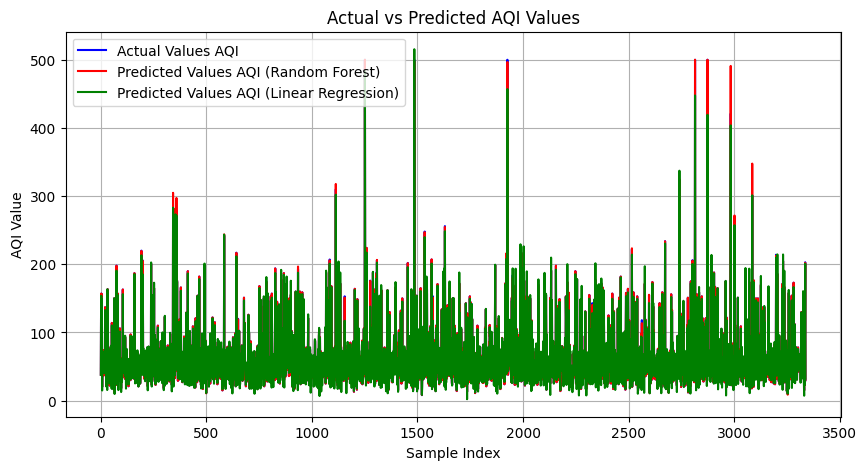

In [41]:
# Ploting The results.
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Values AQI', color='blue')  # Plotting actual values.
plt.plot(y_pred, label='Predicted Values AQI (Random Forest)', color='red')  # Plotting predicted values using Random Forest.
plt.plot(y_pred1, label='Predicted Values AQI (Linear Regression)', color='green')  # Plotting predicted values using Linear Regression.
plt.title('Actual vs Predicted AQI Values')
plt.xlabel('Sample Index')
plt.ylabel('AQI Value')

plt.legend()  # Adding a legend to the plot.
plt.grid(True)  # Adding a grid to the plot.
plt.show()  # Displaying the plot.